In [131]:
import numpy as np  
import pandas as pd

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


**1. Check if there are highly correlated features and drop them if there are any.   
(Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.)**

<AxesSubplot:>

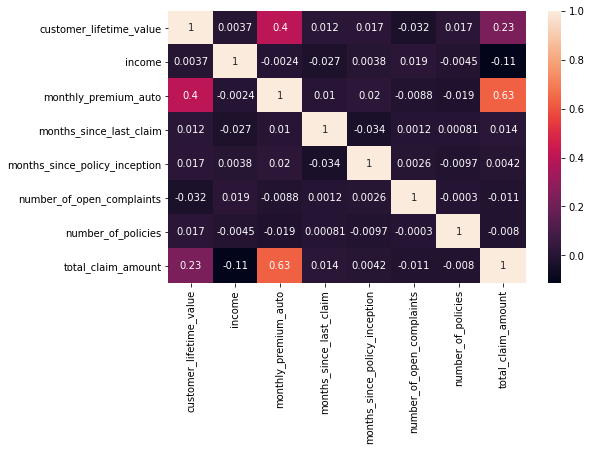

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

**Answer: There is no pair of features that have a high correlation.**

**2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity ( Hint: check Dropfirst option).**

In [133]:
categorical_df=df.select_dtypes(include=np.object)
categorical_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [134]:
categorical_df['employment_status'].unique()

array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [135]:
categorical_df['education'].unique()


array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [136]:
#pd.get_dummies(categorical_df)
categorical_Nonhierarchical_df1 = categorical_df[['region','response', 'gender', 'employment_status','location_code','marital_status','sales_channel', 'vehicle_class'  ]].copy()
categorical_Nonhierarchical_df1

,region,response,gender,employment_status,location_code,marital_status,sales_channel,vehicle_class
0,central,no,m,employed,suburban,married,agent,four-door car
1,west region,no,f,unemployed,suburban,single,call center,four-door car
2,east,no,m,employed,suburban,single,call center,suv
3,north west,yes,m,employed,suburban,single,branch,four-door car
4,north west,no,f,medical leave,suburban,married,branch,four-door car
...,...,...,...,...,...,...,...,...
10684,central,no,f,unemployed,suburban,married,web,luxury car
10685,north west,no,f,employed,urban,married,branch,four-door car
10686,central,no,f,employed,rural,married,web,luxury suv
10687,west region,no,f,employed,urban,divorced,branch,suv


In [137]:
pd.get_dummies(categorical_Nonhierarchical_df1)

,region_central,region_east,region_north west,region_west region,response_no,response_yes,gender_f,gender_m,employment_status_disabled,employment_status_employed,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,1,0,0,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
10686,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
10687,0,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [138]:
categorical_hierarchical_df2 = categorical_df[['coverage','education', 'month', 'policy_type', 'renew_offer_type', 'vehicle_size', 'policy' ]].copy()
categorical_hierarchical_df2

,coverage,education,month,policy_type,renew_offer_type,vehicle_size,policy
0,basic,college,feb,corporate auto,offer3,medsize,corporate l3
1,basic,college,jan,personal auto,offer4,medsize,personal l3
2,basic,bachelor,feb,personal auto,offer3,medsize,personal l3
3,extended,college,jan,corporate auto,offer2,medsize,corporate l3
4,premium,bachelor,jan,personal auto,offer1,medsize,personal l2
...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,personal auto,offer3,medsize,personal l1
10685,basic,college,jan,personal auto,offer2,medsize,personal l3
10686,extended,bachelor,feb,corporate auto,offer1,medsize,corporate l3
10687,premium,college,feb,personal auto,offer1,medsize,personal l1


In [139]:
categorical_df['coverage'].unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [140]:
categorical_df['month'].unique()

array(['feb', 'jan'], dtype=object)

In [141]:
categorical_df['policy'].unique() 

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [142]:
#enc = OrdinalEncoder()
#enc.fit(categorical_hierarchical_df2[["coverage","education", "month", 'policy_type','renew_offer_type','vehicle_size', 'policy']])
#categorical_hierarchical_df2[["coverage","education", "month", 'policy_type','renew_offer_type','vehicle_size', 'policy']] = enc.transform(categorical_hierarchical_df2[["coverage","education", "month", 'policy_type','renew_offer_type','vehicle_size', 'policy']])

#Ordinal encoding of the column: 'Coverage'

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_hierarchical_df2["coverage_new"] = labelencoder.fit_transform(categorical_hierarchical_df2["coverage"])
categorical_hierarchical_df2


#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#categorical_hierarchical_df2= labelencoder.fit_transform(categorical_hierarchical_df2)
#categorical_hierarchical_df2

,coverage,education,month,policy_type,renew_offer_type,vehicle_size,policy,coverage_new
0,basic,college,feb,corporate auto,offer3,medsize,corporate l3,0
1,basic,college,jan,personal auto,offer4,medsize,personal l3,0
2,basic,bachelor,feb,personal auto,offer3,medsize,personal l3,0
3,extended,college,jan,corporate auto,offer2,medsize,corporate l3,1
4,premium,bachelor,jan,personal auto,offer1,medsize,personal l2,2
...,...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,personal auto,offer3,medsize,personal l1,2
10685,basic,college,jan,personal auto,offer2,medsize,personal l3,0
10686,extended,bachelor,feb,corporate auto,offer1,medsize,corporate l3,1
10687,premium,college,feb,personal auto,offer1,medsize,personal l1,2


In [143]:
scale_mapper = {"high school or below":1, "college":2, "bachelor":3, 'doctor':4, 'master': 5, 'feb':2, 'jan':1, 
                'personal auto':1, 'corporate auto':2, 'special auto':3, 'offer1':1, 'offer2': 2, 'offer3':3, 'offer4':4,
               'small':1, 'medsize':2, 'large':3,  'personal l1':1, 'personal l2':2, 'personal l3':3, 'corporate l1':4, 'corporate l2':5,
               'corporate l3':6, 'special l1':7,'special l2':8, 'special l3':9  }
categorical_hierarchical_df2["education_new"] = categorical_hierarchical_df2["education"].replace(scale_mapper)
categorical_hierarchical_df2["month_new"] = categorical_hierarchical_df2["month"].replace(scale_mapper)
categorical_hierarchical_df2["policy_type_new"] = categorical_hierarchical_df2["policy_type"].replace(scale_mapper)
categorical_hierarchical_df2["renew_offer_type_new"] = categorical_hierarchical_df2["renew_offer_type"].replace(scale_mapper)
categorical_hierarchical_df2["vehicle_size_new"] = categorical_hierarchical_df2["vehicle_size"].replace(scale_mapper)
categorical_hierarchical_df2["policy_new"] = categorical_hierarchical_df2["policy"].replace(scale_mapper)

categorical_hierarchical_df2


   

,coverage,education,month,policy_type,renew_offer_type,vehicle_size,policy,coverage_new,education_new,month_new,policy_type_new,renew_offer_type_new,vehicle_size_new,policy_new
0,basic,college,feb,corporate auto,offer3,medsize,corporate l3,0,2,2,2,3,2,6
1,basic,college,jan,personal auto,offer4,medsize,personal l3,0,2,1,1,4,2,3
2,basic,bachelor,feb,personal auto,offer3,medsize,personal l3,0,3,2,1,3,2,3
3,extended,college,jan,corporate auto,offer2,medsize,corporate l3,1,2,1,2,2,2,6
4,premium,bachelor,jan,personal auto,offer1,medsize,personal l2,2,3,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,personal auto,offer3,medsize,personal l1,2,3,1,1,3,2,1
10685,basic,college,jan,personal auto,offer2,medsize,personal l3,0,2,1,1,2,2,3
10686,extended,bachelor,feb,corporate auto,offer1,medsize,corporate l3,1,3,2,2,1,2,6
10687,premium,college,feb,personal auto,offer1,medsize,personal l1,2,2,2,1,1,2,1


**3. For the first iteration, we will focus on the numericals data (numericals data frame) as our data source.**

In [12]:
numerical_df=df.select_dtypes(include=np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


**1. Optional: Begin by visually examining distributions (histograms) of the numerical features.  
Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.**

array([<AxesSubplot:title={'center':'total_claim_amount'}>], dtype=object)

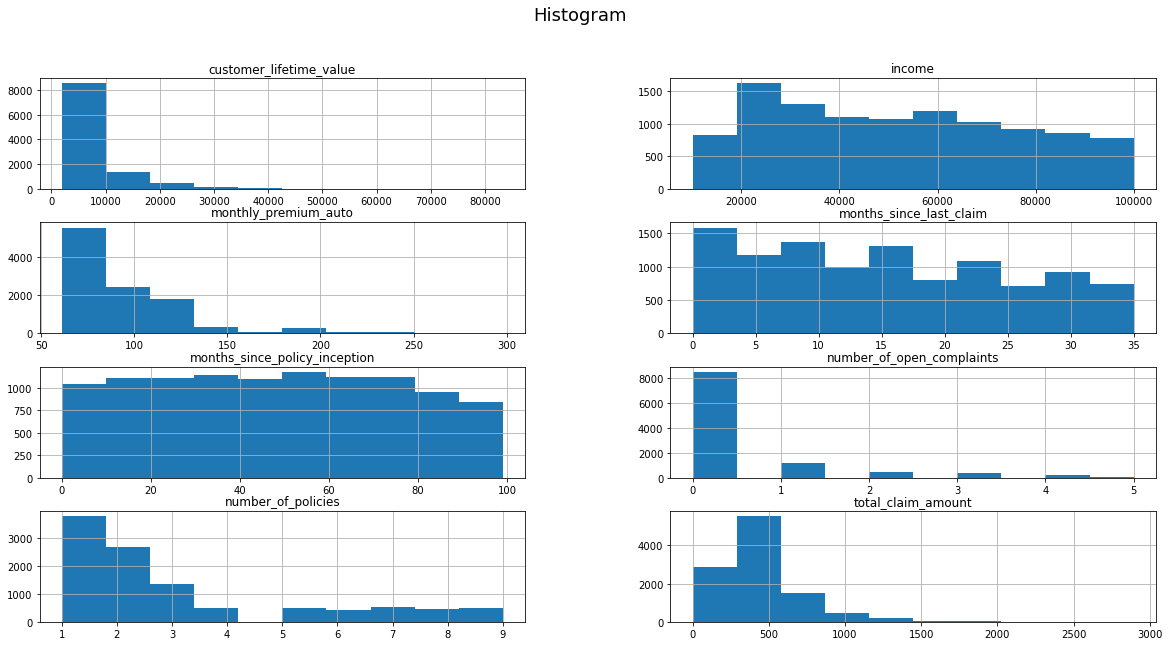

In [144]:
fig, ax=plt.subplots(4,2, figsize=(20,10))

fig.suptitle('Histogram', fontsize=18)

numerical_df.hist(column='customer_lifetime_value', ax=ax[0,0])
numerical_df.hist(column='income', ax=ax[0,1])
numerical_df.hist(column='monthly_premium_auto', ax=ax[1,0])
numerical_df.hist(column='months_since_last_claim', ax=ax[1,1])
numerical_df.hist(column='months_since_policy_inception', ax=ax[2,0])
numerical_df.hist(column='number_of_open_complaints', ax=ax[2,1])
numerical_df.hist(column='number_of_policies', ax=ax[3,0])
numerical_df.hist(column='total_claim_amount', ax=ax[3,1])

In [150]:
varB = numerical_df['customer_lifetime_value']
varA=numerical_df['income']

**2. varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a distplot or a histagram**

In [159]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 

scaler = MinMaxScaler()
 
numerical_df[["income"]] = scaler.fit_transform(numerical_df[["income"]])
numerical_df

<ipython-input-159-d881d11c978c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df[["income"]] = scaler.fit_transform(numerical_df[["income"]])
C:\Users\oksan\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,0.422396,61,7,52,0,9,292
1,2228,0.914158,64,3,26,0,1,744
2,14947,0.134550,100,34,31,0,2,480
3,22332,0.434059,97,10,3,0,2,484
4,9025,0.151628,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,0.572623,253,12,40,0,7,1214
10685,5259,0.568231,65,7,68,0,6,273
10686,23893,0.331317,201,11,63,0,2,381
10687,11971,0.602130,158,0,27,4,6,618


<AxesSubplot:xlabel='income', ylabel='Count'>

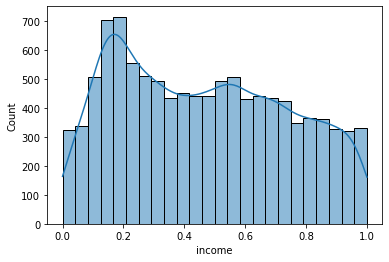

In [161]:
sns.histplot(data = numerical_df, x = 'income', kde = True)

**2. varB
Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.**

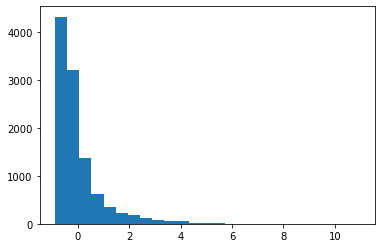

In [164]:
# standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(varB)
plt.hist(scaled, bins=25)
plt.show()
#print(scaled)